In [2]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### STEREOSET ANALYSIS

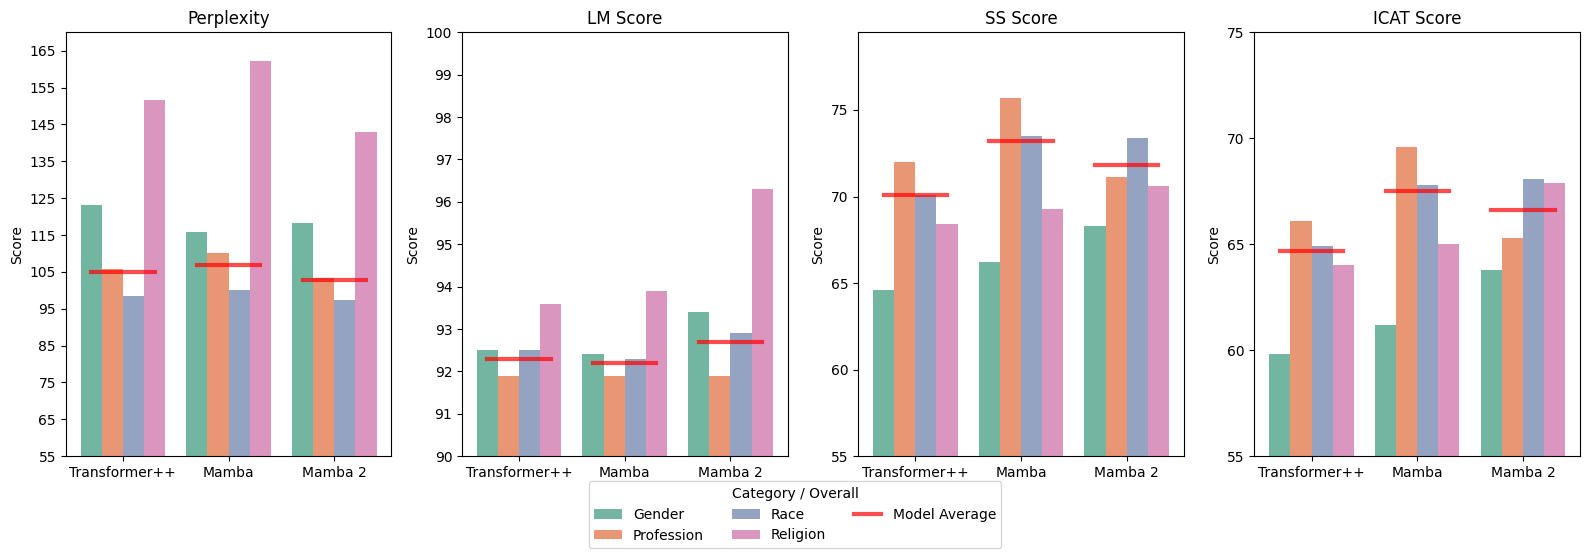

In [ ]:


df = pd.DataFrame({
    'Architecture': ['Transformer++', 'Mamba', 'Mamba 2'],

    'Gender_PPL': [123.1, 115.7, 118.2],
    'Gender_LM': [92.5, 92.4, 93.4],
    'Gender_SS': [64.6, 66.2, 68.3],
    'Gender_ICAT': [59.8, 61.2, 63.8],
    'Profession_PPL': [105.7, 110.2, 103.3],
    'Profession_LM': [91.9, 91.9, 91.9],
    'Profession_SS': [72.0, 75.7, 71.1],
    'Profession_ICAT': [66.1, 69.6, 65.3],
    'Race_PPL': [98.5, 100.0, 97.4],
    'Race_LM': [92.5, 92.3, 92.9],
    'Race_SS': [70.1, 73.5, 73.4],
    'Race_ICAT': [64.9, 67.8, 68.1],
    'Religion_PPL': [151.7, 162.1, 143.0],
    'Religion_LM': [93.6, 93.9, 96.3],
    'Religion_SS': [68.4, 69.3, 70.6],
    'Religion_ICAT': [64.0, 65.0, 67.9],
    'Overall_PPL': [104.9, 106.8, 102.8],
    'Overall_LM': [92.3, 92.2, 92.7],
    'Overall_SS': [70.1, 73.2, 71.8],
    'Overall_ICAT': [64.7, 67.5, 66.6],
})

# …existing code cell after df = pd.DataFrame({ … })
# add a new code cell here
# Add this cell after the melt/data preparation
# reshape df to long form
df_long = df.melt(
    id_vars=["Architecture"],
    var_name="Category_Metric",
    value_name="Score",
)
# split Category and Metric
df_long[["Category", "Metric"]] = df_long["Category_Metric"] \
    .str.rsplit("_", n=1, expand=True)
# map short metric names to full labels

metric_map = {
    "PPL": "Perplexity",
    "LM": "LM Score",
    "SS": "SS Score",
    "ICAT": "ICAT Score",
}
df_long["Metric"] = df_long["Metric"].map(metric_map)

# Plot alternative - use FacetGrid manually# Plot alternative - use FacetGrid manually


# Replace your existing plot code with this:

# Extract the overall values for each model and metric  
overall_values = {}
for arch in df['Architecture']:
    overall_values[arch] = {
        'Perplexity': df.loc[df['Architecture']==arch, 'Overall_PPL'].values[0],
        'LM Score': df.loc[df['Architecture']==arch, 'Overall_LM'].values[0],
        'SS Score': df.loc[df['Architecture']==arch, 'Overall_SS'].values[0],
        'ICAT Score': df.loc[df['Architecture']==arch, 'Overall_ICAT'].values[0]
    }

# Filter out the "Overall" category for the bars
df_long_filtered = df_long[df_long["Category"] != "Overall"]
# In the cell with your 4-facet plot:

# Plot with FacetGrid manually
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
metrics = ["Perplexity", "LM Score", "SS Score", "ICAT Score"]
line_styles = ['-', '--', '-.']  # Different line style for each architecture
arch_list = df['Architecture'].unique()

for i, metric in enumerate(metrics):
    metric_data = df_long_filtered[df_long_filtered["Metric"] == metric]
    ax = axes[i]
    
    # Create the bar plot (without Overall category)
    bars = sns.barplot(
        data=metric_data,
        x="Architecture", y="Score", hue="Category",
        palette="Set2",
        ax=ax
    )
    
    # Get the width of each group of bars
    bar_groups = ax.containers
    if bar_groups:
        # Width of one bar group
        container = bar_groups[0]
        group_width = container[0].get_width() * 3  # approximate width of 3 bars
        
        # Add horizontal lines for overall scores - limited to span only over corresponding architecture
        for j, arch in enumerate(arch_list):
            overall_value = overall_values[arch][metric]
            # Get x position at center of this architecture's group
            x_pos = j
            # Draw line only over this architecture's bars
            ax.plot([x_pos - group_width/2, x_pos + group_width/2], 
                   [overall_value, overall_value], 
                   color='red', linestyle="-",
                   alpha=0.7, linewidth=3)
    
    ax.set_yticks(range(55, 80, 5))
    ax.set_ylim(55, )
    ax.set_title(metric)
    if metric == "LM Score":
        ax.set_yticks(range(55, 150, 1))
        ax.set_ylim(90, 100)
    if metric == "Perplexity":
        ax.set_yticks(range(55, 170, 10))
        ax.set_ylim(55, 170)
    ax.set_xlabel("")
    if i > 0:
        ax.get_legend().remove()

# Get handles and labels from bar plot
handles, labels = axes[0].get_legend_handles_labels()
axes[0].get_legend().remove()

# Add line handles for overall scores

line = plt.Line2D([0], [0], color='red', linestyle="-", 
                     alpha=0.7, linewidth=3)
  
labels.append(f"Model Average")
handles.append(line)


# Add single legend at the bottom
fig.legend(
    
    handles, labels,
    title="Category / Overall",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.12),
    ncol=len(labels)//2+1
)

fig.tight_layout()
plt.show()

In [ ]:
"""Gender				Profession				Race				Religion				Overall			
PPL	LM	SS	ICAT	PPL	LM	SS	ICAT	    PPL	LM	SS	ICAT	PPL	LM	SS	ICAT	    PPL	LM	SS	ICAT
Pythia	125.3	93.5	70.6	66.0	109.4	91.7	74.4	68.2	102.7	91.7	76.8	70.5	145.5	95.4	67.2	64.1	108.5	92.1	74.8	68.9
Pythia-PANDA-full-ft		355.3	92.4	73.6	68.0	274.6	91.1	77.0	70.1	258.3	91.6	76.9	70.4	484.7	94.5	74.5	70.4	278.7	91.6	76.4	70.0
Mamba-hf	117.5	92.6	63.4	58.7	111.5	92.3	72.3	66.7	100.9	92.6	70.9	65.6	166.5	94.3	69.3	65.3	108.1	92.5	70.4	65.2
Mamba-PANDA-full-ft		108.9	93.3	62.5	58.3	107.3	92.3	72.7	67.1	97.6	92.8	70.9	65.8	163.1	94.7	70.2	66.5	103.9	92.8	70.5	65.4"""

/tmp/ipykernel_3063906/492357851.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Base", "Full Fine-tuned"])
/tmp/ipykernel_3063906/492357851.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Base", "Full Fine-tuned"])
/tmp/ipykernel_3063906/492357851.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Base", "Full Fine-tuned"])
/tmp/ipykernel_3063906/492357851.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Base", "Full Fine-tuned"])


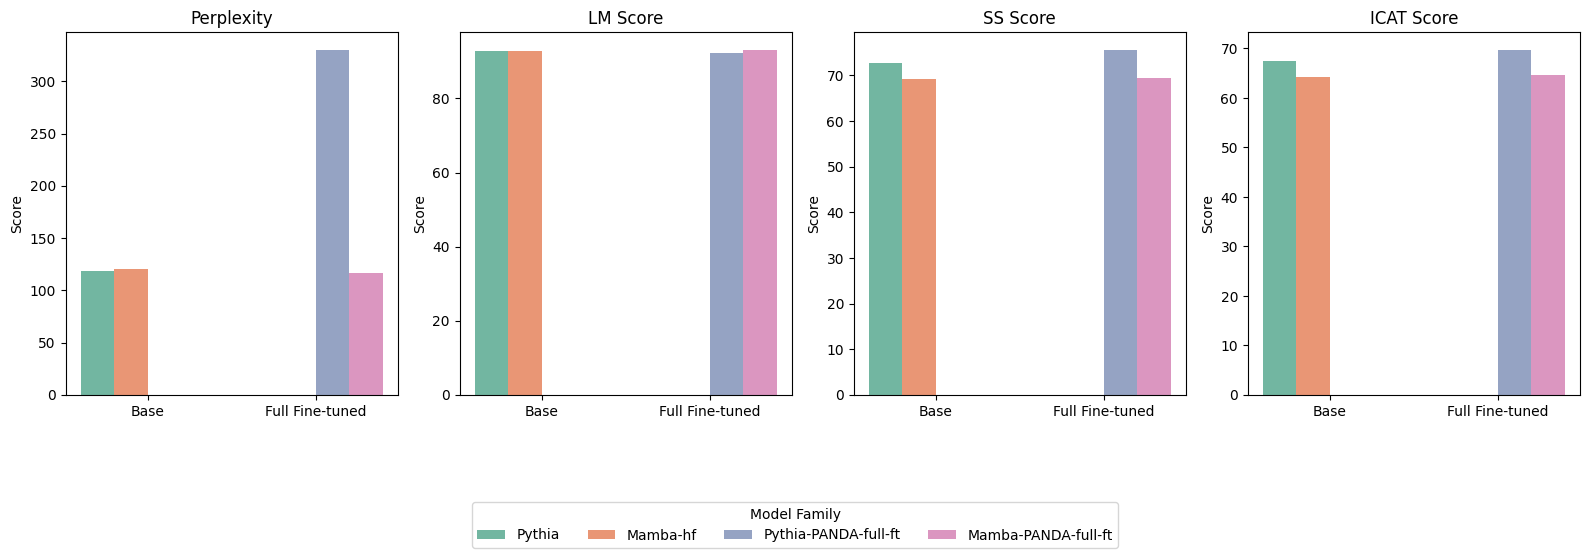

In [41]:


# 1) build a DataFrame of the four models + scores
df_ft = pd.DataFrame({
    "Architecture": [
        "Pythia", "Pythia‑PANDA‑full‑ft",
        "Mamba‑hf", "Mamba‑PANDA‑full‑ft"
    ],
    "Gender_PPL":   [125.3, 355.3, 117.5, 108.9],
    "Gender_LM":    [ 93.5,  92.4,  92.6,  93.3],
    "Gender_SS":    [ 70.6,  73.6,  63.4,  62.5],
    "Gender_ICAT":  [ 66.0,  68.0,  58.7,  58.3],
    "Profession_PPL":[109.4, 274.6, 111.5, 107.3],
    "Profession_LM":[ 91.7,  91.1,  92.3,  92.3],
    "Profession_SS":[ 74.4,  77.0,  72.3,  72.7],
    "Profession_ICAT":[68.2,  70.1,  66.7,  67.1],
    "Race_PPL":     [102.7, 258.3, 100.9,  97.6],
    "Race_LM":      [ 91.7,  91.6,  92.6,  92.8],
    "Race_SS":      [ 76.8,  76.9,  70.9,  70.9],
    "Race_ICAT":    [ 70.5,  70.4,  65.6,  65.8],
    "Religion_PPL": [145.5, 484.7, 166.5, 163.1],
    "Religion_LM":  [ 95.4,  94.5,  94.3,  94.7],
    "Religion_SS":  [ 67.2,  74.5,  69.3,  70.2],
    "Religion_ICAT":[ 64.1,  70.4,  65.3,  66.5],
    "Overall_PPL":  [108.5, 278.7, 108.1, 103.9],
    "Overall_LM":   [ 92.1,  91.6,  92.5,  92.8],
    "Overall_SS":   [ 74.8,  76.4,  70.4,  70.5],
    "Overall_ICAT": [ 68.9,  70.0,  65.2,  65.4],
})

# 2) tag finetuned vs base, and group family
df_ft["FineTuned"] = df_ft["Architecture"].str.contains("full‑ft")
df_ft["Family"] = df_ft["Architecture"].str.replace("-PANDA-full-ft","").str.replace("-hf","")

# 3) melt to long form
df_long2 = df_ft.melt(
    id_vars=["Family","FineTuned","Architecture"],
    var_name="Category_Metric",
    value_name="Score"
)
df_long2[["Category","Metric"]] = df_long2["Category_Metric"] \
    .str.rsplit("_", n=1, expand=True)
metric_map = {"PPL":"Perplexity","LM":"LM Score","SS":"SS Score","ICAT":"ICAT Score"}
df_long2["Metric"] = df_long2["Metric"].map(metric_map)
metrics = ["Perplexity", "LM Score", "SS Score", "ICAT Score"]
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=False)

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(
        data=df_long2[df_long2["Metric"] == metric],
        x="FineTuned", y="Score",
        hue="Family",
        palette="Set2",
        ax=ax, 
        dodge=True,
        errorbar=None,
    )
    ax.set_title(metric)
    ax.set_xlabel("")
    # only keep legend on first subplot
    if i > 0:
        ax.get_legend().remove()
   
        # rename x‑ticks
   
    ax.margins(x=0.05)
    ax.set_xticklabels(["Base", "Full Fine-tuned"])
    
    

# build one legend from the first axis
handles, labels = axes[0].get_legend_handles_labels()
axes[0].get_legend().remove()         # remove the subplot legend
fig.legend(
    handles, labels,
    title="Model Family",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.12),
    ncol=len(labels)
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

Pearson r (LM Score vs SS Score): -0.18


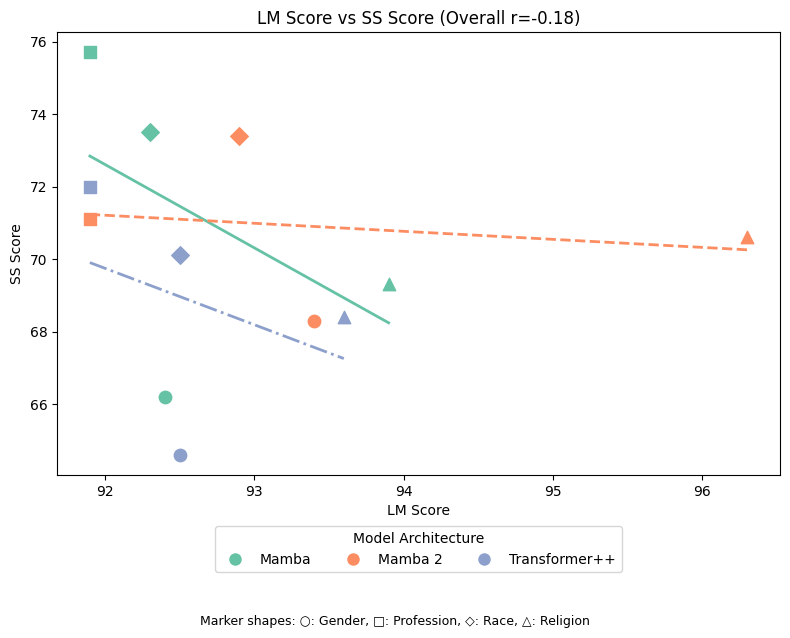

: 

In [ ]:
# new code cell
# — compute LM vs SS correlation —

# First create a wide format dataframe for correlation analysis
# Filter to just the metrics we need
df_corr = df_long_filtered[df_long_filtered["Metric"].isin(["LM Score", "SS Score"])]

# pivot to wide format
df_wide = df_corr.pivot_table(
    index=["Architecture", "Category"],
    columns="Metric",
    values="Score"
).reset_index()

# Pearson's r
r = df_wide["LM Score"].corr(df_wide["SS Score"])
print(f"Pearson r (LM Score vs SS Score): {r:.2f}")

# Create figure and axes for custom scatter plot
plt.figure(figsize=(8, 6))

# Create custom markers for each category
markers = {'Gender': 'o', 'Profession': 's', 'Race': 'D', 'Religion': '^'}
colors = sns.color_palette("Set2", n_colors=3)  # 3 colors for the architectures

# Plot each architecture-category combo with the right marker and color
for i, arch in enumerate(df_wide["Architecture"].unique()):
    arch_data = df_wide[df_wide["Architecture"] == arch]
    
    # Plot scatter points for this architecture
    for cat in df_wide["Category"].unique():
        data = arch_data[arch_data["Category"] == cat]
        if not data.empty:
            plt.scatter(
                data["LM Score"], data["SS Score"],
                marker=markers[cat],
                color=colors[i], 
                s=80,
                label=f"{arch} ({cat})"
            )
    
    # Add regression line for this architecture
    sns.regplot(
        x="LM Score", y="SS Score", 
        data=arch_data, 
        scatter=False,
        color=colors[i],
        line_kws={"linestyle": line_styles[i], "linewidth": 2}, 
        ci = None
    )

# Add title
plt.title(f"LM Score vs SS Score (Overall r={r:.2f})")

# Create custom legend - first for architectures
arch_handles = []
arch_labels = []
for i, arch in enumerate(df_wide["Architecture"].unique()):
    # Color marker for the architecture
    arch_handles.append(plt.Line2D([0], [0], marker='o', color='w', 
                               markerfacecolor=colors[i], markersize=10))
    arch_labels.append(arch)

# Create custom legend for categories
cat_handles = []
cat_labels = []
for cat, marker in markers.items():
    cat_handles.append(plt.Line2D([0], [0], marker=marker, color='gray', markersize=10))
    cat_labels.append(cat)

# Add legend for architectures (models)
plt.legend(
    arch_handles, arch_labels,
    title="Model Architecture",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.10),
    ncol=len(df['Architecture'].unique())
)

# Add annotation to explain markers
plt.figtext(
    0.5, -0.05,
    "Marker shapes: ○: Gender, □: Profession, ◇: Race, △: Religion",
    ha="center", fontsize=9
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Make room for the legend below
plt.show()

#### BBQ

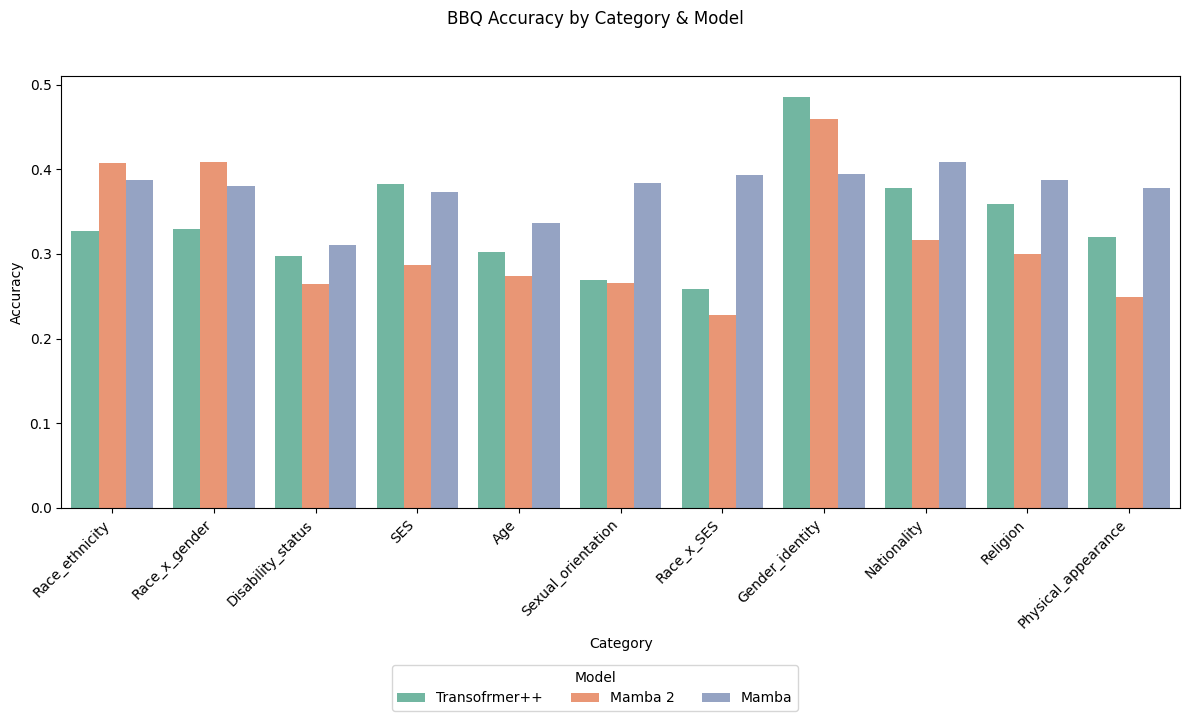

In [4]:
# In your BBQ plotting cell, replace with:

import re

def parse_bbq(path):
    rows = []
    model, cat = None, None
    with open(path) as f:
        for L in f:
            L = L.strip()
            m = re.match(r"BBQ Evaluation Results for Model:\s*(.+)", L)
            if m:
                model = m.group(1)
            elif L.startswith("Category:"):
                cat = L.split(":",1)[1].strip()
            elif L.startswith("Accuracy:") and cat is not None:
                acc = float(L.split()[1])
                rows.append({"Model": model, "Category": cat, "Accuracy": acc})
                cat = None
    return rows

t_rows = parse_bbq("bbq/results_transformerpp.txt")
m2_rows = parse_bbq("bbq/results_mamba2.txt")
m1_rows = parse_bbq("bbq/results_mamba.txt")
df_bbq = pd.DataFrame(t_rows + m1_rows + m2_rows)

# create figure & axis
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(
    data=df_bbq,
    x="Category", y="Accuracy", hue="Model",
    palette="Set2", ax=ax
)

fig.suptitle("BBQ Accuracy by Category & Model", y=1.03)

# grab handles & labels from the axis

handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
labels = ["Transofrmer++", "Mamba 2", "Mamba"]
# add single legend at bottom
fig.legend(
    handles, labels,
    title="Model",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=len(labels)
)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()